# 9. Model Optimization and Advanced Boosting


## 9.1 k-Fold Cross Validation

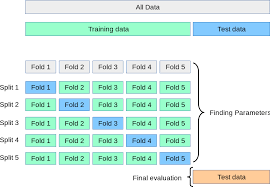


- **Idea**: Instead of splitting data into just one training and one test set, the dataset is divided into *k* equal folds.  
- The model is trained on *k-1* folds and validated on the remaining fold.  
- This process is repeated *k* times, and the average performance is reported.  

**Benefits**:
- Reduces bias in performance estimation.  
- Uses all data points for both training and validation.  

Equation for k-Fold Accuracy:  

$$
Accuracy = \frac{1}{k} \sum_{i=1}^{k} Accuracy_i
$$


## 9.2 Grid Search


- **Goal**: Find the best hyperparameters for a model by searching across a predefined parameter grid.  
- For each parameter combination, the model is trained and evaluated using cross-validation.  

**Steps**:
1. Define a grid of hyperparameters (e.g., C, gamma for SVM).  
2. Train and evaluate models for every parameter combination.  
3. Select the set of hyperparameters that yields the highest performance metric.  

Note: Grid Search can be computationally expensive for large parameter spaces.  


## 9.3 XGBoost


- **XGBoost (Extreme Gradient Boosting)** is one of the most powerful ensemble algorithms.  
- Works by building multiple decision trees sequentially, where each tree corrects the errors of the previous one.  

**Advantages**:
- Fast and efficient.  
- Handles missing values automatically.  
- High accuracy in structured/tabular data.  

**Implementation Steps**:
1. Import the libraries.  
2. Import the dataset.  
3. Split the dataset into Training and Test sets.  
4. Train XGBoost on the Training set.  
5. Make predictions & confusion matrix.  
6. Apply **k-Fold Cross Validation** to evaluate.  

---


## 9.4 CatBoost

- **CatBoost** = Category Boosting.  
- Gradient boosting model designed to handle **categorical features** natively without heavy preprocessing.  
- Strong competitor to **LightGBM** and **XGBoost**, especially for datasets with many categorical variables.  

**Advantages**:
- Reduces the need for one-hot encoding.  
- Avoids overfitting with built-in regularization.  
- Often requires less parameter tuning ("self-tuning").  

**Steps for Implementation**:
1. Import the libraries.  
2. Import the dataset.  
3. Split the dataset into Training and Test sets.  
4. Train CatBoost on the Training set.  
5. Make predictions & confusion matrix.  
6. Apply **k-Fold Cross Validation** to evaluate.  

---

With these methods — *Cross Validation, Grid Search, XGBoost, and CatBoost* — you now have some of the **most powerful tools in Machine Learning** to optimize and boost model performance in real-world datasets.


## Example k-fold in XGBoodt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/data/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

In [8]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


/tmp/ipython-input-282457109.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


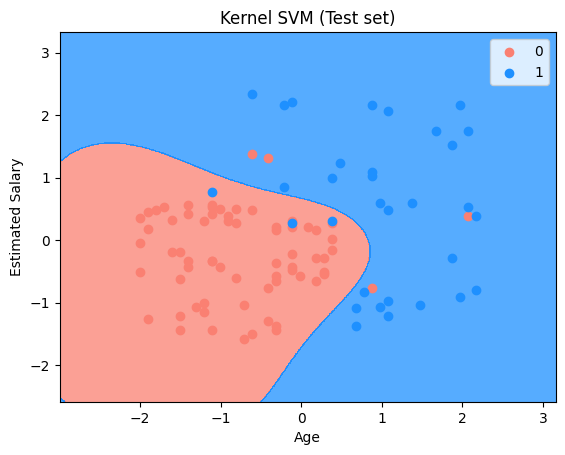

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#  Final Conclusion



This course has taken us on a complete journey **from raw data to advanced Machine Learning models**, covering every step in the workflow:

1. **Preprocessing & Data Cleaning**  
   - Handling missing values, encoding categorical data, normalization, and scaling.  
   - Ensuring data quality to prevent bias and leakage.  

2. **Feature Engineering**  
   - Feature selection (correlation, PCA) and feature construction.  
   - Transforming raw inputs into meaningful representations that improve model performance.  

3. **Model Building**  
   - **Regression**: Linear Regression, Support Vector Regression (SVR).  
   - **Classification**: Logistic Regression, SVM, Decision Trees, Random Forests.  
   - **Unsupervised Learning**: Clustering (K-Means, Hierarchical), Association Rule Learning (Apriori, Eclat).  
   - **Natural Language Processing (NLP)**: Bag-of-Words, TF-IDF, word embeddings.  
   - **Deep Learning**: ANN for general tasks, CNNs for image recognition.  

4. **Dimensionality Reduction**  
   - Applying **PCA** (and Kernel PCA) to reduce complexity while retaining variance.  

5. **Model Optimization**  
   - **k-Fold Cross Validation** for robust evaluation.  
   - **Grid Search** for hyperparameter tuning.  
   - Boosting techniques: **XGBoost** and **CatBoost** for state-of-the-art performance.  

---

### Key Takeaways
- Machine Learning is not only about choosing an algorithm but about **building a reliable pipeline**:  
  *Data → Preprocessing → Feature Engineering → Model Training → Optimization → Evaluation.*  
- Each algorithm has its **strengths and limitations**, so the right choice depends on the dataset and problem.  
- Modern boosting methods (XGBoost, CatBoost) highlight how **automation and efficiency** are driving real-world success.  
- Proper **evaluation metrics** (MSE, R², Accuracy, Precision, Recall, F1, ROC-AUC) ensure that models are not only accurate but also generalize to unseen data.  

---

### Final Note
By mastering this workflow, you now have the skills to approach **any machine learning problem** systematically. Whether it’s structured data, text, or images, you can design, train, optimize, and evaluate models with confidence.  

This is **Machine Learning from A to Z** — a foundation that equips you to tackle research, real-world applications, and future advances in AI.  
